In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

# Load the Titanic dataset
file_path = '/kaggle/input/titanic/Titanic_Dataset.xlsx'  # Adjust the file path if necessary
titanic = pd.read_excel(file_path)

# Display basic information about the dataset
print(titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    float64
 1   Survived       418 non-null    float64
 2   Unnamed: 2     0 non-null      float64
 3   Unnamed: 3     0 non-null      float64
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     0 non-null      float64
 6   Unnamed: 6     0 non-null      float64
 7   PassengerId.1  891 non-null    int64  
 8   Survived.1     891 non-null    int64  
 9   Pclass         891 non-null    int64  
 10  Name           891 non-null    object 
 11  Sex            891 non-null    object 
 12  Age            714 non-null    float64
 13  SibSp          891 non-null    int64  
 14  Parch          891 non-null    int64  
 15  Ticket         891 non-null    object 
 16  Fare           891 non-null    float64
 17  Cabin          204 non-null    object 
 18  Embarked  

In [2]:
# Display summary statistics for numeric columns
print(titanic.describe())


       PassengerId    Survived  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
count   418.000000  418.000000         0.0         0.0         0.0   
mean   1100.500000    0.363636         NaN         NaN         NaN   
std     120.810458    0.481622         NaN         NaN         NaN   
min     892.000000    0.000000         NaN         NaN         NaN   
25%     996.250000    0.000000         NaN         NaN         NaN   
50%    1100.500000    0.000000         NaN         NaN         NaN   
75%    1204.750000    1.000000         NaN         NaN         NaN   
max    1309.000000    1.000000         NaN         NaN         NaN   

       Unnamed: 5  Unnamed: 6  PassengerId.1  Survived.1      Pclass  ...  \
count         0.0         0.0     891.000000  891.000000  891.000000  ...   
mean          NaN         NaN     446.000000    0.383838    2.308642  ...   
std           NaN         NaN     257.353842    0.486592    0.836071  ...   
min           NaN         NaN       1.000000    0.000000    1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [3]:
# Check for missing data and data types
print(titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    float64
 1   Survived       418 non-null    float64
 2   Unnamed: 2     0 non-null      float64
 3   Unnamed: 3     0 non-null      float64
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     0 non-null      float64
 6   Unnamed: 6     0 non-null      float64
 7   PassengerId.1  891 non-null    int64  
 8   Survived.1     891 non-null    int64  
 9   Pclass         891 non-null    int64  
 10  Name           891 non-null    object 
 11  Sex            891 non-null    object 
 12  Age            714 non-null    float64
 13  SibSp          891 non-null    int64  
 14  Parch          891 non-null    int64  
 15  Ticket         891 non-null    object 
 16  Fare           891 non-null    float64
 17  Cabin          204 non-null    object 
 18  Embarked  

In [4]:
# Count the number of survivors and non-survivors
print(titanic['Survived'].value_counts())


Survived
0.0    266
1.0    152
Name: count, dtype: int64


In [5]:
# Count the number of passengers in each class
print(titanic['Pclass'].value_counts())


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [6]:
# Count the number of male and female passengers
print(titanic['Sex'].value_counts())


Sex
male      577
female    314
Name: count, dtype: int64


In [7]:
# Count the number of passengers that boarded from each port
print(titanic['Embarked'].value_counts())


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

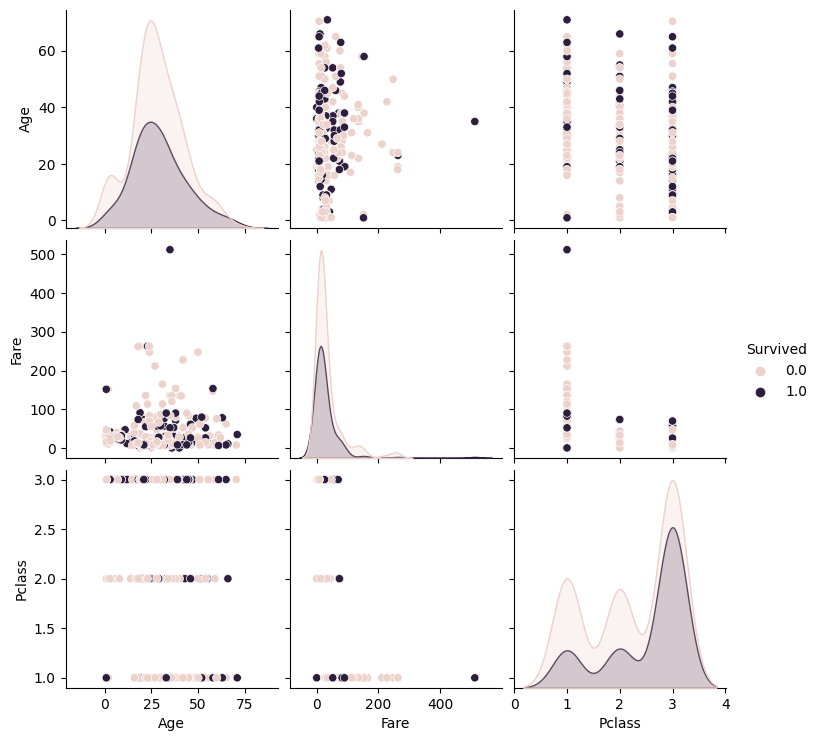

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between numerical variables
sns.pairplot(titanic, hue='Survived', vars=['Age', 'Fare', 'Pclass'])

# Show the plot
plt.show()


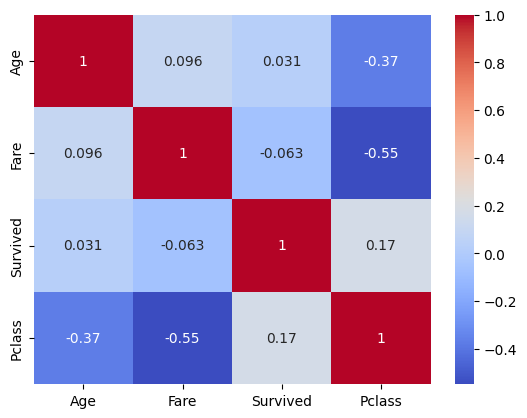

In [9]:
# Calculate the correlation matrix for the dataset
correlation_matrix = titanic[['Age', 'Fare', 'Survived', 'Pclass']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


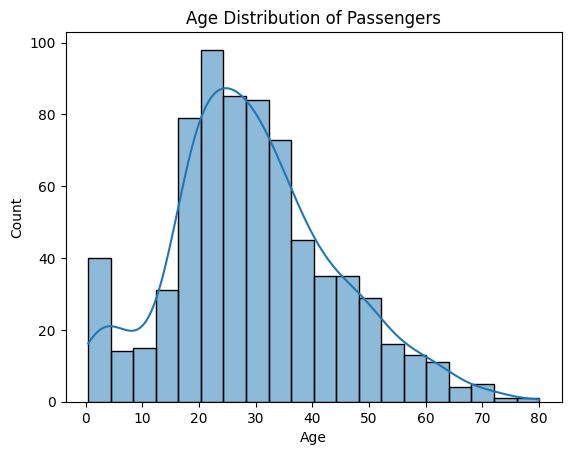

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


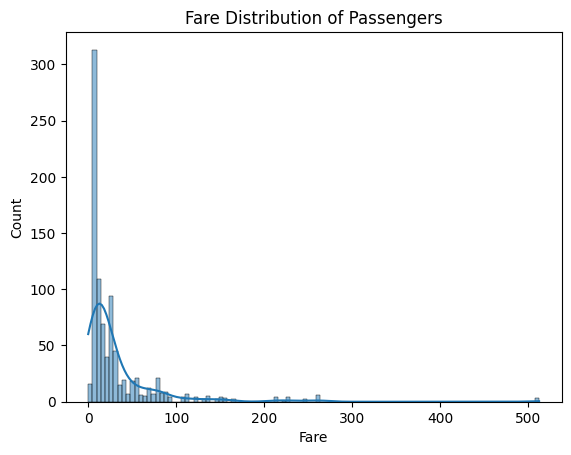

In [10]:
# Plot histogram for Age distribution
sns.histplot(titanic['Age'].dropna(), kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

# Plot histogram for Fare distribution
sns.histplot(titanic['Fare'], kde=True)
plt.title('Fare Distribution of Passengers')
plt.show()


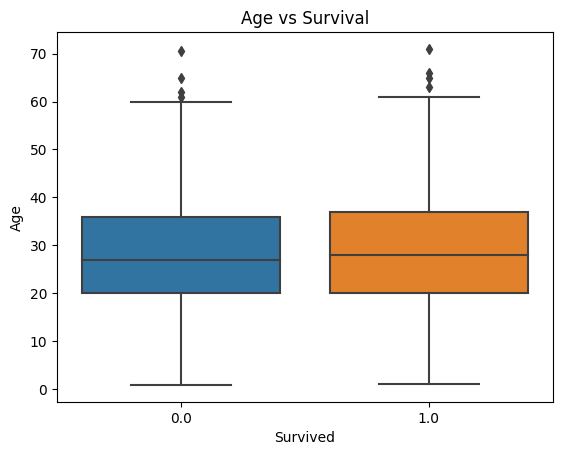

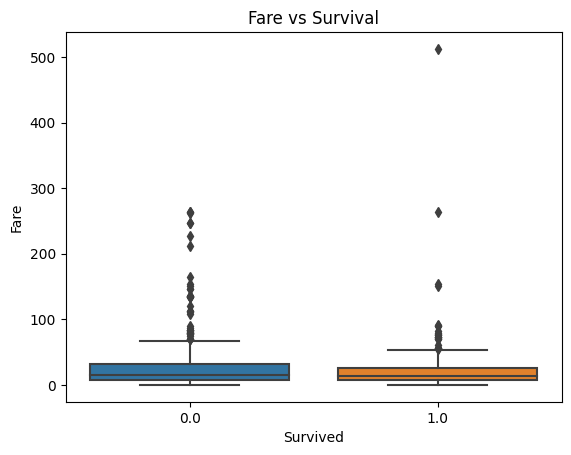

In [11]:
# Boxplot for Age distribution by survival status
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age vs Survival')
plt.show()

# Boxplot for Fare distribution by survival status
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Fare vs Survival')
plt.show()


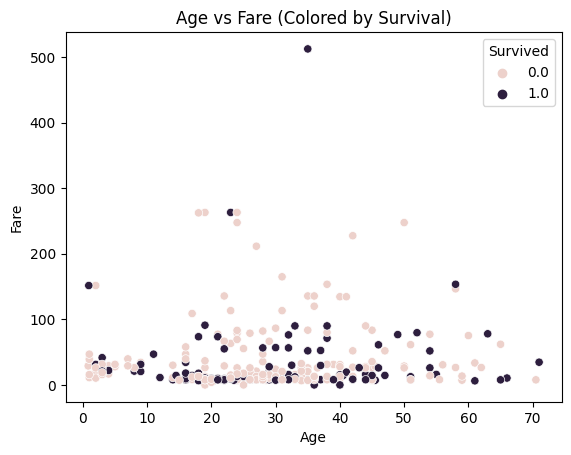

In [12]:
# Scatterplot between Age and Fare, colored by survival status
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.title('Age vs Fare (Colored by Survival)')
plt.show()


In [13]:
# Calculate survival rate by passenger class
survival_by_class = titanic.groupby('Pclass')['Survived'].mean()
print(survival_by_class)


Pclass
1    0.255319
2    0.284091
3    0.436441
Name: Survived, dtype: float64


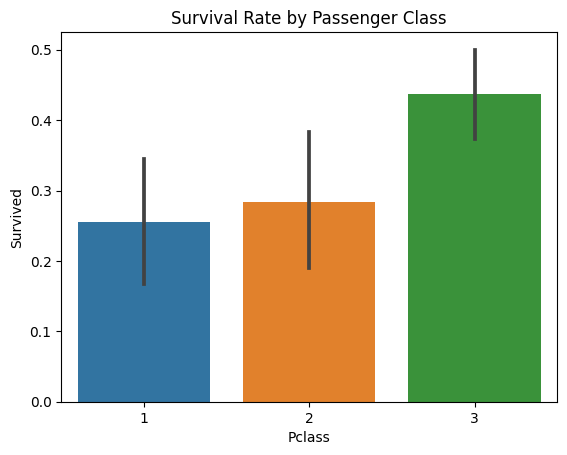

In [14]:
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()


In [15]:
# Calculate survival rate by gender
survival_by_gender = titanic.groupby('Sex')['Survived'].mean()
print(survival_by_gender)


Sex
female    0.362500
male      0.364341
Name: Survived, dtype: float64


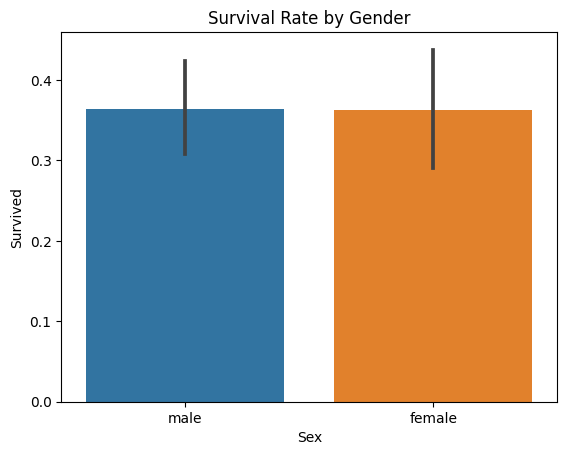

In [16]:
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.show()


In [17]:
# Create age bins
bins = [0, 12, 18, 30, 40, 50, 60, 70, 100]
labels = ['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71+']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels)

# Calculate survival rate by age group
survival_by_age_group = titanic.groupby('AgeGroup')['Survived'].mean()
print(survival_by_age_group)


AgeGroup
0-12     0.323529
13-18    0.468750
19-30    0.342857
31-40    0.328358
41-50    0.371429
51-60    0.388889
61-70    0.571429
71+      0.500000
Name: Survived, dtype: float64


/tmp/ipykernel_31/866169518.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = titanic.groupby('AgeGroup')['Survived'].mean()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


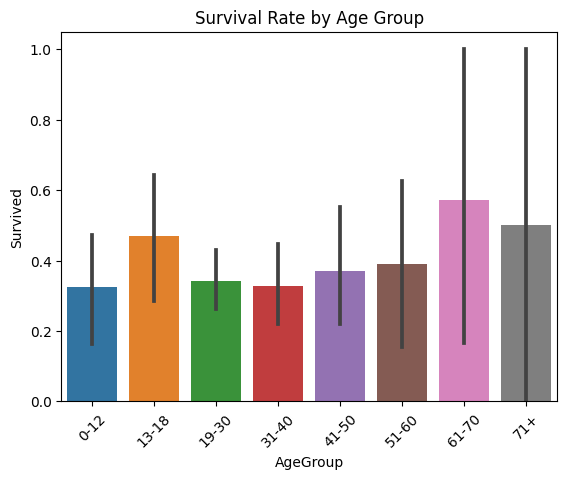

In [18]:
sns.barplot(x='AgeGroup', y='Survived', data=titanic)
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Calculate survival rate by embarkation point
survival_by_embarkation = titanic.groupby('Embarked')['Survived'].mean()
print(survival_by_embarkation)


Embarked
C    0.337500
Q    0.390244
S    0.368243
Name: Survived, dtype: float64


In [20]:
# Compute correlations
correlation_matrix = titanic[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].corr()
print(correlation_matrix)


               Age      Fare     SibSp     Parch  Survived
Age       1.000000  0.096067 -0.308247 -0.189119  0.031077
Fare      0.096067  1.000000  0.159651  0.216225 -0.062519
SibSp    -0.308247  0.159651  1.000000  0.414838  0.028095
Parch    -0.189119  0.216225  0.414838  1.000000 -0.054338
Survived  0.031077 -0.062519  0.028095 -0.054338  1.000000


In [23]:
# Dynamically create fare groups based on quartiles
fare_quantiles = pd.qcut(titanic['Fare'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
titanic['FareGroup'] = fare_quantiles

# Calculate survival rate by fare group
survival_by_fare_group = titanic.groupby('FareGroup')['Survived'].mean()
print(survival_by_fare_group)


FareGroup
Q1    0.376238
Q2    0.405405
Q3    0.359223
Q4    0.310680
Name: Survived, dtype: float64


/tmp/ipykernel_31/2551455940.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_group = titanic.groupby('FareGroup')['Survived'].mean()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


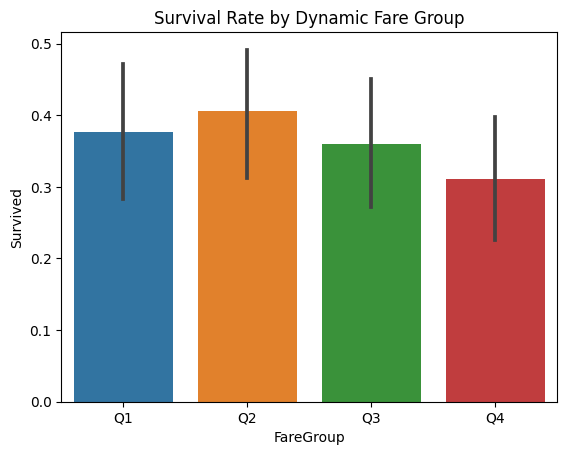

In [24]:
sns.barplot(x='FareGroup', y='Survived', data=titanic)
plt.title('Survival Rate by Dynamic Fare Group')
plt.show()


In [26]:
# Extract deck letter from cabin column
titanic['Deck'] = titanic['Cabin'].str.extract('([A-Za-z])')

# Calculate survival rate by deck
survival_by_deck = titanic.groupby('Deck')['Survived'].mean()
print(survival_by_deck)


Deck
A    0.333333
B    0.125000
C    0.218750
D    0.285714
E    0.454545
F    0.250000
G    0.000000
T    0.000000
Name: Survived, dtype: float64


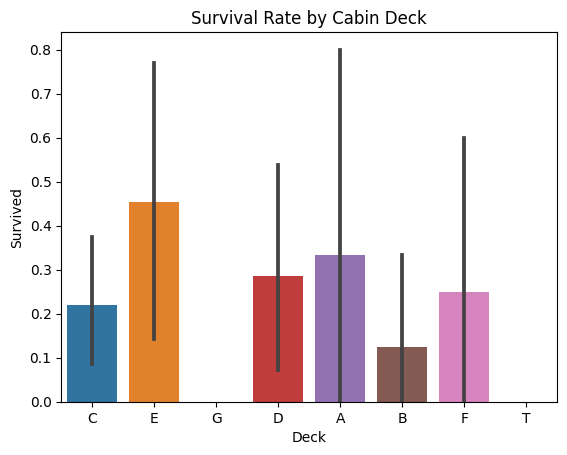

In [27]:
sns.barplot(x='Deck', y='Survived', data=titanic)
plt.title('Survival Rate by Cabin Deck')
plt.show()


In [28]:
# Create a new feature for the length of the name
titanic['NameLength'] = titanic['Name'].apply(len)

# Calculate survival rate by name length
survival_by_name_length = titanic.groupby('NameLength')['Survived'].mean()
print(survival_by_name_length)


NameLength
12         NaN
13    1.000000
14    0.000000
15    0.333333
16    0.384615
17    0.214286
18    0.400000
19    0.266667
20    0.227273
21    0.350000
22    0.555556
23    0.350000
24    0.523810
25    0.346154
26    0.360000
27    0.227273
28    0.190476
29    0.615385
30    0.360000
31    0.500000
32    0.250000
33    0.500000
34    0.500000
35    0.333333
36    1.000000
37    0.750000
38    0.250000
39    0.333333
40    0.400000
41    0.666667
42    0.500000
43         NaN
44    0.000000
45    0.500000
46    0.250000
47    0.333333
48    0.000000
49    1.000000
50    0.333333
51    0.500000
52    0.000000
53         NaN
54         NaN
55    0.500000
56    0.000000
57    0.000000
61         NaN
65         NaN
67         NaN
82    0.000000
Name: Survived, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


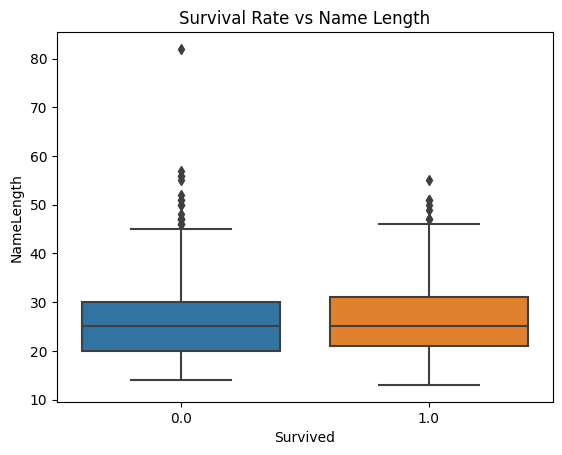

In [29]:
sns.boxplot(x='Survived', y='NameLength', data=titanic)
plt.title('Survival Rate vs Name Length')
plt.show()


In [30]:
# Create an interaction feature for Fare and Age
titanic['Fare_Age_Interaction'] = titanic['Fare'] * titanic['Age']

# Calculate survival rate by interaction feature
survival_by_interaction = titanic.groupby('Fare_Age_Interaction')['Survived'].mean()
print(survival_by_interaction)


Fare_Age_Interaction
0.000000        0.5
3.577014        NaN
9.715000        NaN
11.133300       0.0
14.443725       NaN
               ... 
9556.050000     0.0
12376.040000    0.0
16832.000000    NaN
17931.522000    1.0
18443.851200    NaN
Name: Survived, Length: 612, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


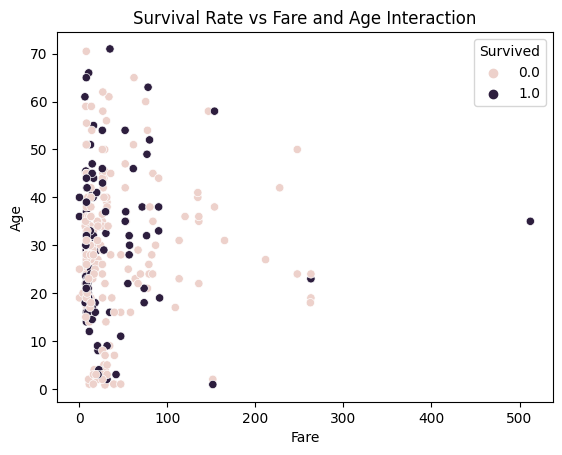

In [31]:
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=titanic)
plt.title('Survival Rate vs Fare and Age Interaction')
plt.show()


In [32]:
# Create an interaction feature for Age and Pclass
titanic['Age_Pclass_Interaction'] = titanic['Age'] * titanic['Pclass']

# Calculate survival rate by interaction feature
survival_by_age_pclass = titanic.groupby('Age_Pclass_Interaction')['Survived'].mean()
print(survival_by_age_pclass)


Age_Pclass_Interaction
0.92      1.0
1.26      NaN
1.34      NaN
1.66      0.0
2.00      0.0
         ... 
183.00    1.0
189.00    NaN
195.00    1.0
211.50    0.0
222.00    NaN
Name: Survived, Length: 128, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


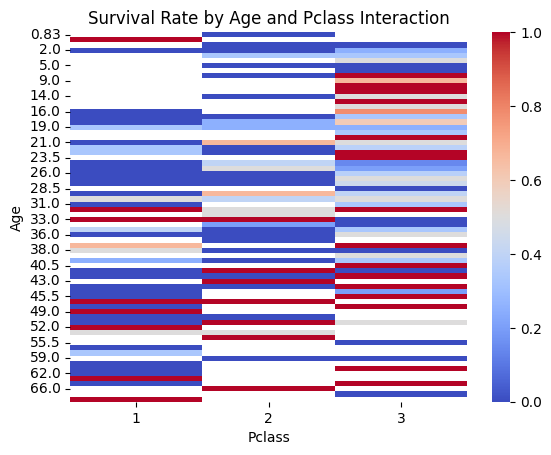

In [33]:
sns.heatmap(titanic.pivot_table('Survived', 'Age', 'Pclass'), cmap='coolwarm')
plt.title('Survival Rate by Age and Pclass Interaction')
plt.show()


In [34]:
# Extract ticket prefix
titanic['TicketPrefix'] = titanic['Ticket'].str.extract('([A-Za-z]+)')

# Calculate survival rate by ticket prefix
survival_by_ticket_prefix = titanic.groupby('TicketPrefix')['Survived'].mean()
print(survival_by_ticket_prefix)


TicketPrefix
A        0.466667
C        0.352941
CA       0.428571
F        0.500000
Fa       0.000000
LINE     0.333333
P        0.000000
PC       0.281250
PP       0.333333
S        0.666667
SC       0.333333
SCO      1.000000
SO       0.000000
SOTON    0.500000
STON     0.400000
SW       0.000000
W        0.333333
WE            NaN
Name: Survived, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/usr/local/lib/python3.11/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


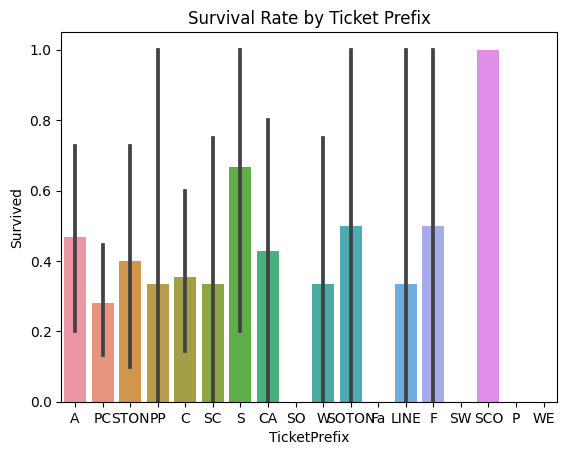

In [35]:
sns.barplot(x='TicketPrefix', y='Survived', data=titanic)
plt.title('Survival Rate by Ticket Prefix')
plt.show()


In [36]:
# Extract name prefix
titanic['NamePrefix'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Calculate survival rate by name prefix and gender
survival_by_name_prefix = titanic.groupby(['NamePrefix', 'Sex'])['Survived'].mean()
print(survival_by_name_prefix)


NamePrefix    Sex   
Capt          male           NaN
Col           male           NaN
Don           male      0.000000
Dr            female         NaN
              male      0.000000
Jonkheer      male           NaN
Lady          female         NaN
Major         male           NaN
Master        male      0.391304
Miss          female    0.366337
Mlle          female         NaN
Mme           female    0.000000
Mr            male      0.364035
Mrs           female    0.362069
Ms            female         NaN
Rev           male      0.666667
Sir           male           NaN
the Countess  female         NaN
Name: Survived, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


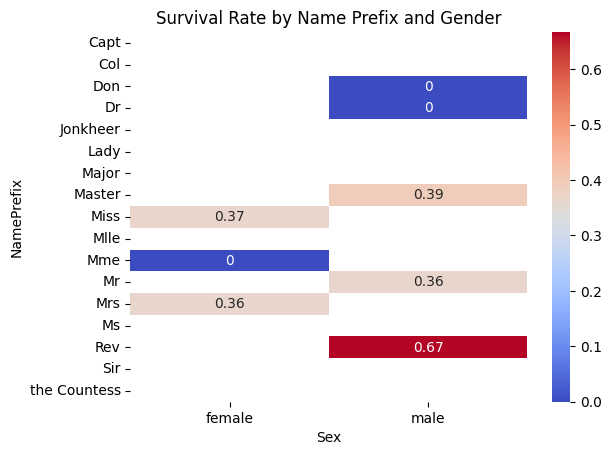

In [37]:
sns.heatmap(survival_by_name_prefix.unstack(), annot=True, cmap='coolwarm')
plt.title('Survival Rate by Name Prefix and Gender')
plt.show()


In [39]:
# Create interaction feature for Pclass and SibSp
titanic['Pclass_SibSp_Interaction'] = titanic['Pclass'] * titanic['SibSp']

# Calculate survival rate by interaction feature
survival_by_pclass_sibsp = titanic.groupby('Pclass_SibSp_Interaction')['Survived'].mean()
print(survival_by_pclass_sibsp)


Pclass_SibSp_Interaction
0     0.348921
1     0.400000
2     0.269231
3     0.425532
4     0.500000
6     0.555556
9     0.625000
12    0.181818
15    0.333333
24    0.500000
Name: Survived, dtype: float64


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


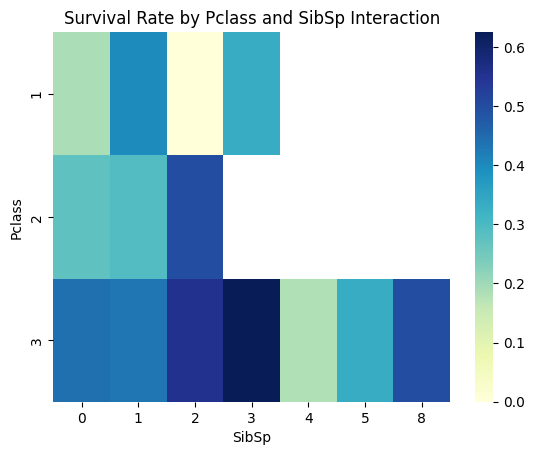

In [40]:
sns.heatmap(titanic.pivot_table('Survived', 'Pclass', 'SibSp'), cmap='YlGnBu')
plt.title('Survival Rate by Pclass and SibSp Interaction')
plt.show()


In [41]:
# Create interaction feature for Embarked and Age
titanic['Embarked_Age_Interaction'] = titanic['Embarked'].astype(str) + '_' + titanic['Age'].astype(str)

# Calculate survival rate by interaction feature
survival_by_embarked_age = titanic.groupby('Embarked_Age_Interaction')['Survived'].mean()
print(survival_by_embarked_age)


Embarked_Age_Interaction
C_0.42           NaN
C_0.75           NaN
C_1.0       0.000000
C_11.0           NaN
C_12.0      1.000000
              ...   
S_80.0           NaN
S_9.0       0.666667
S_nan       0.307692
nan_38.0    0.000000
nan_62.0         NaN
Name: Survived, Length: 167, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


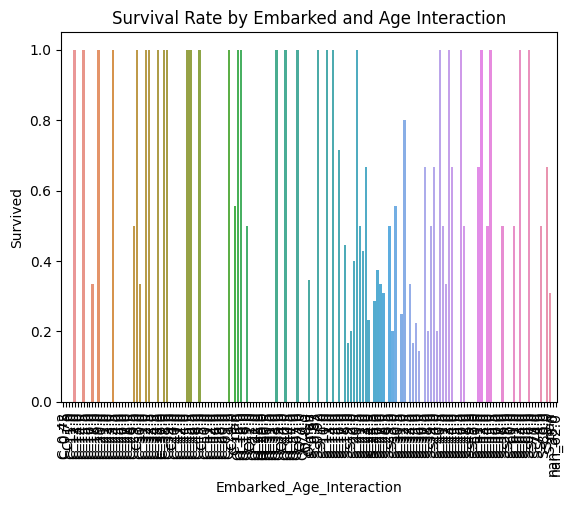

In [42]:
survival_by_embarked_age = survival_by_embarked_age.reset_index()
sns.barplot(x='Embarked_Age_Interaction', y='Survived', data=survival_by_embarked_age)
plt.title('Survival Rate by Embarked and Age Interaction')
plt.xticks(rotation=90)
plt.show()


In [43]:
# Create age groups
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child', 'Teenager', 'Adult', 'Senior Adult', 'Elderly']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels, right=False)

# Dynamically create fare groups
fare_quantiles = pd.qcut(titanic['Fare'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
titanic['FareGroup'] = fare_quantiles

# Calculate survival rate by AgeGroup and FareGroup
survival_by_age_fare = titanic.groupby(['AgeGroup', 'FareGroup'])['Survived'].mean()
print(survival_by_age_fare)


AgeGroup      FareGroup
Child         Q1                NaN
              Q2           0.000000
              Q3           0.277778
              Q4           0.384615
Teenager      Q1           0.750000
              Q2           0.545455
              Q3           0.666667
              Q4           0.200000
Adult         Q1           0.375000
              Q2           0.403226
              Q3           0.266667
              Q4           0.314286
Senior Adult  Q1           0.300000
              Q2           0.391304
              Q3           0.344828
              Q4           0.312500
Elderly       Q1           0.666667
              Q2           1.000000
              Q3           0.000000
              Q4           0.400000
Name: Survived, dtype: float64


/tmp/ipykernel_31/426679898.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_fare = titanic.groupby(['AgeGroup', 'FareGroup'])['Survived'].mean()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [45]:
# Create a new feature for family size
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

# Calculate survival rate by family size
survival_by_family_size = titanic.groupby('FamilySize')['Survived'].mean()
print(survival_by_family_size)


FamilySize
0     0.348548
1     0.435294
2     0.346939
3     0.250000
4     0.555556
5     0.166667
6     0.285714
7     0.333333
10    0.500000
Name: Survived, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


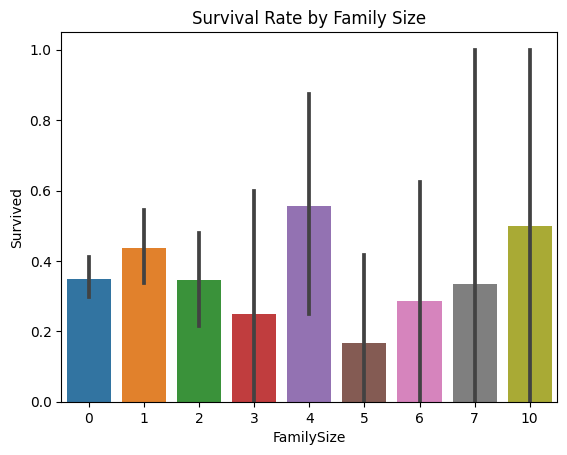

In [46]:
sns.barplot(x='FamilySize', y='Survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.show()


In [47]:
# Extract title from name
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Calculate survival rate by title
survival_by_title = titanic.groupby('Title')['Survived'].mean()
print(survival_by_title)


Title
Capt                 NaN
Col                  NaN
Don             0.000000
Dr              0.000000
Jonkheer             NaN
Lady                 NaN
Major                NaN
Master          0.391304
Miss            0.366337
Mlle                 NaN
Mme             0.000000
Mr              0.364035
Mrs             0.362069
Ms                   NaN
Rev             0.666667
Sir                  NaN
the Countess         NaN
Name: Survived, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/usr/local/lib/python3.11/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


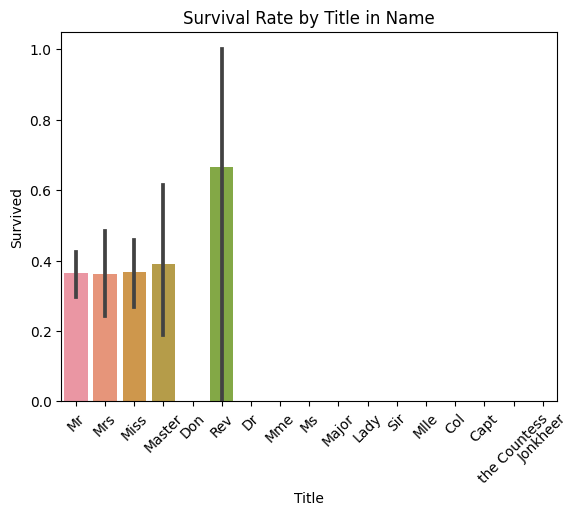

In [48]:
sns.barplot(x='Title', y='Survived', data=titanic)
plt.title('Survival Rate by Title in Name')
plt.xticks(rotation=45)
plt.show()
